In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Plotting Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [28]:
aes_data_dir      = '/Volumes/TI27457/ttb/circuits/aes-logs'
# aes_data_dir      = '/Volumes/TI27457/ttb/circuits/aes-logs-50ktests-5kres-100ps'
aes_counter_df    = load_data_df(aes_data_dir)
aes_counter_sizes = load_counter_sizes(aes_data_dir)

In [29]:
# Split Data by Counter Type
aes_ctype_groups  = aes_counter_df.groupby('Counter Type')
# uart_ctype_groups = uart_counter_df.groupby('Counter Type')

# Plot Settings

In [30]:
# Plot Settings
FIG_WIDTH  = 12
FIG_HEIGHT = 6
SAVE_AS_PDF = True
AES_HIST_PDF_FILENAME = 'aes_histogram.pdf'
AES_FP_PDF_FILENAME   = 'aes_false_positives.pdf'
# UART_HISTOGRAM_PDF_FILENAME = 'uart_histogram.pdf'
# UART_FP_PDF_FILENAME = 'uart_false_positives.pdf'
CTYPES = ['TJFREE']
# CTYPES = ['CDD', 'CDN', 'CND', 'CNN', 'DDD', 'DDN', 'DND', 'DNN', 'TJFREE']

# Plot Counter Size Histogram

Histogram: [  0 344   0  40   0  22]
Bins:      [  0   8  16  32  64 128 256]


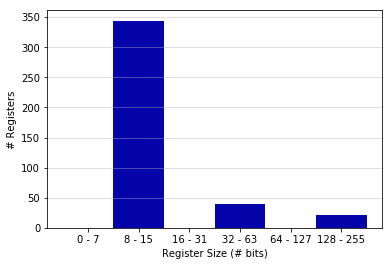

<Figure size 432x288 with 0 Axes>

In [19]:
bins = [0,8,16,32,64,128,256] # your bins
data = aes_counter_sizes['Coalesced Sizes'] # random data

# Create Histogram
hist, bin_edges = np.histogram(data,bins) # make the histogram
print "Histogram:", hist
print "Bins:     ", bin_edges

# Plot Histogram
fig,ax = plt.subplots()
ax.bar(\
    range(len(hist)),\
    hist,\
    width      = 1,\
    align      = 'center',\
    tick_label = ['{} - {}'.format(bins[i], bins[i+1]-1) for i,j in enumerate(hist)],
    color      = '#0504aa')

ax.set_xlabel('Register Size (# bits)')
ax.set_ylabel('# Registers')
ax.grid(axis='y', alpha=0.5)
plt.show()

# Save Histogram to PDF
if SAVE_AS_PDF:
    plt.savefig(AES_HIST_PDF_FILENAME, format='pdf')

# Plot AES Data

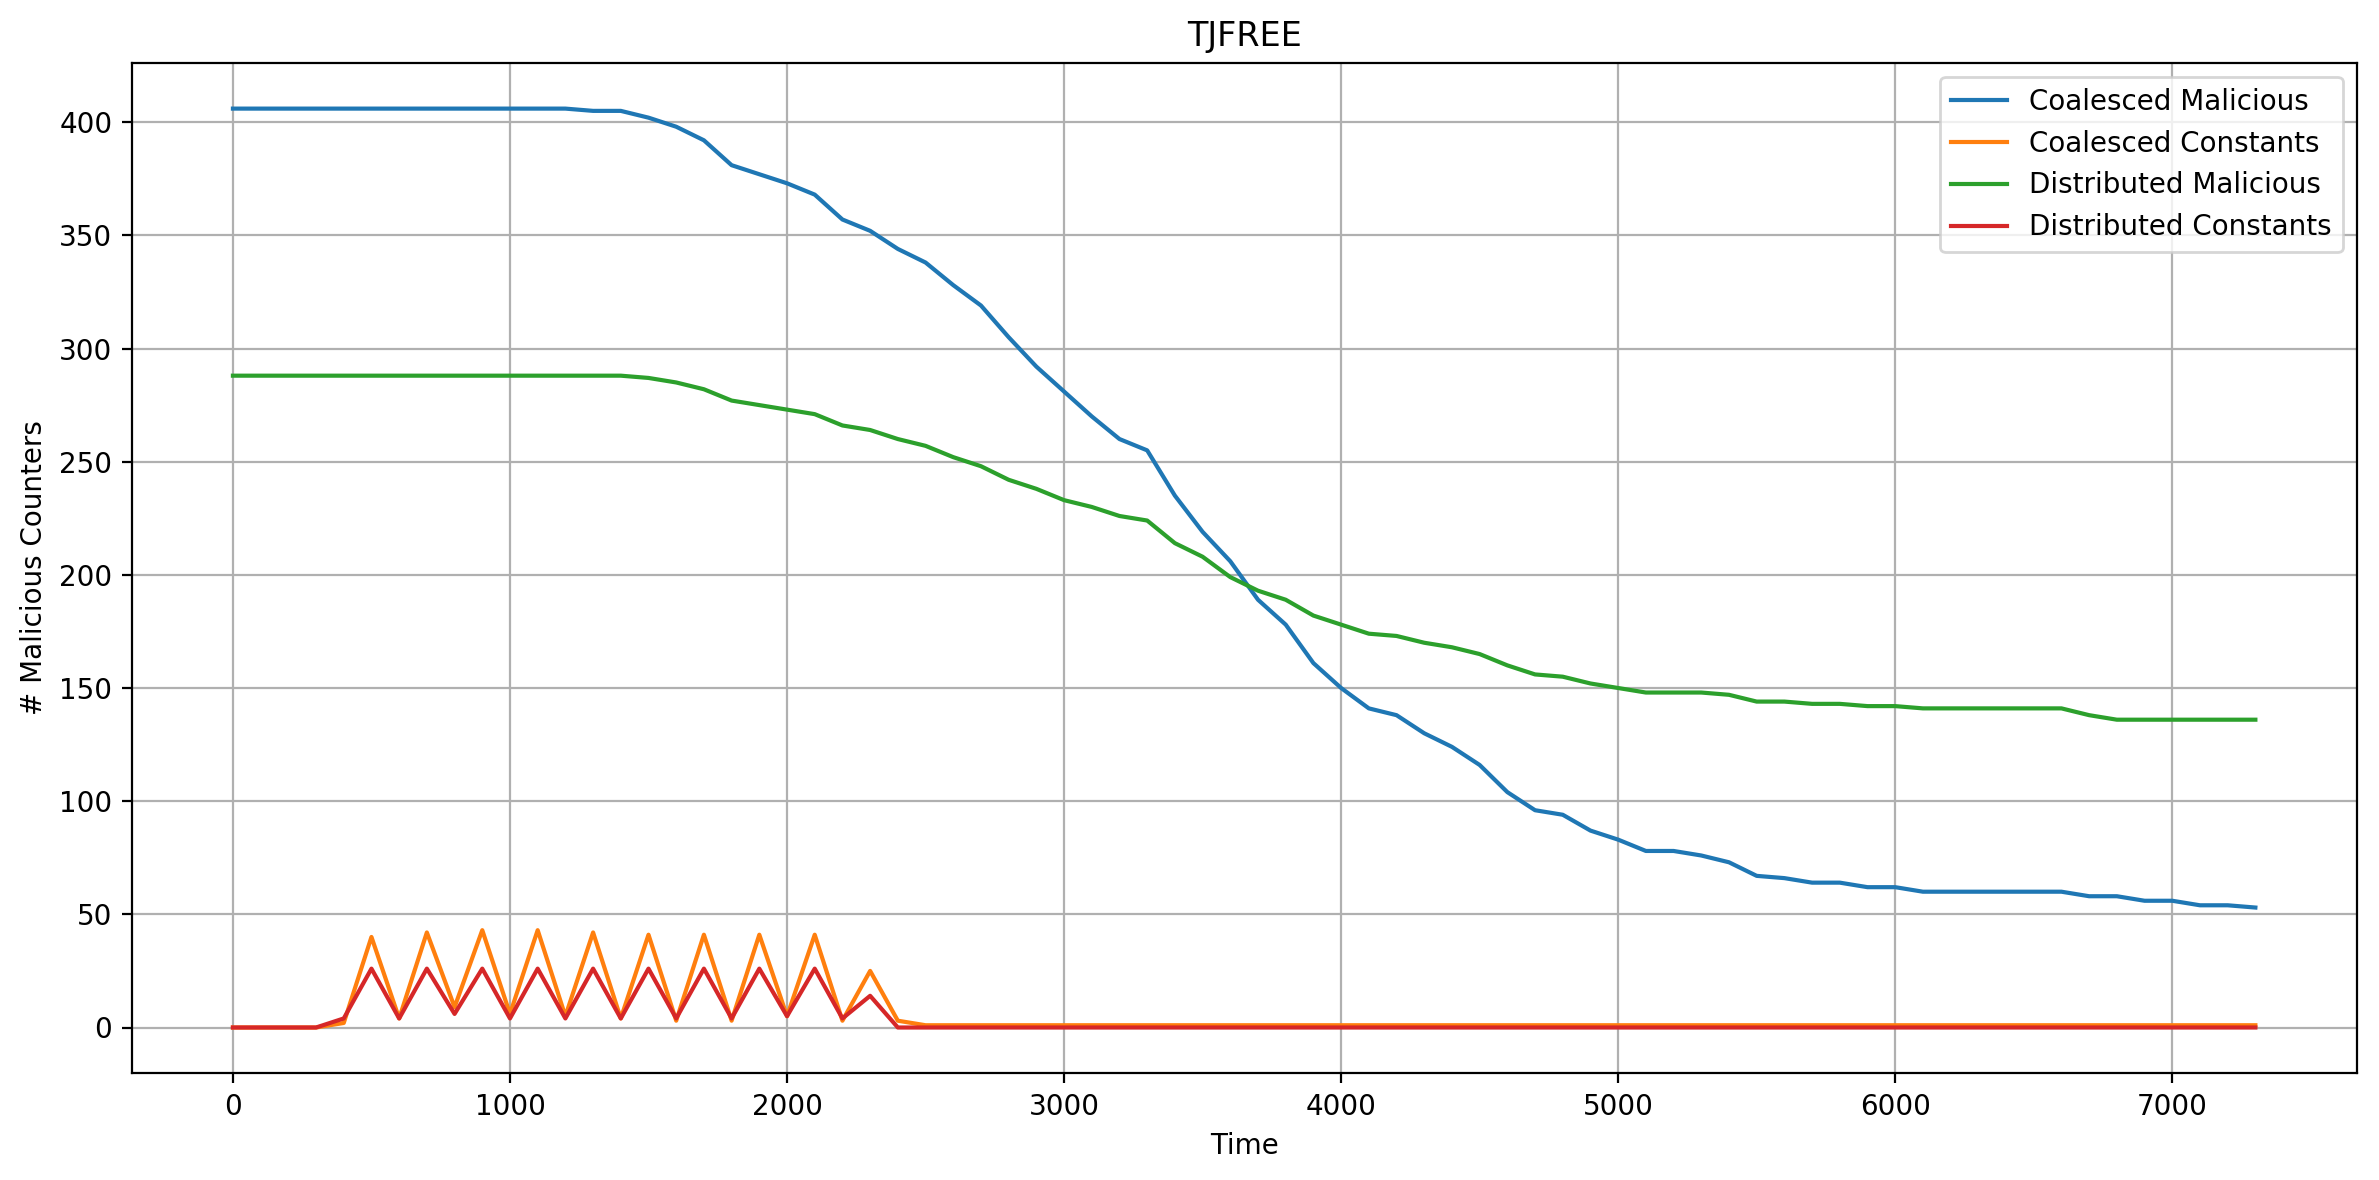

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

# for i in range(len(axes.flat)):
for i in range(1):
#     ax    = axes.flat[i]
    ax    = axes
    ctype = CTYPES[i]
    df    = aes_ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="Time", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Coalesced Constants", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Constants", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('Time')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Coalesced Constants", "Distributed Malicious", "Distributed Constants"])
plt.tight_layout(h_pad=1)

# Scale the plot
# ax.set_xlim(0, 50000)

if SAVE_AS_PDF:
    plt.savefig(AES_FP_PDF_FILENAME, format='pdf')

# Plot UART Data

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

for i in range(len(axes.flat)):
    ax    = axes.flat[i]
    ctype = CTYPES[i]
    df    = uart_ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="# Tests", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="# Tests", y="Distributed Malicious", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('# Tests')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Distributed Malicious"])
plt.tight_layout(h_pad=1)

if SAVE_AS_PDF:
    plt.savefig(UART_PDF_FILENAME, format='pdf')